# Introduction

Notebook to do digit recognition with **Keras library**

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


# Load Data

In [2]:
os.listdir('../data')

['test.csv', 'train.csv', '.ipynb_checkpoints']

In [3]:
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')

print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0].values
y_train = y_train.reshape((y_train.shape[0], 1))

X_test = test.iloc[:,0:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(42000, 784)
(42000, 1)
(28000, 784)


In [43]:
Xtrain = np.reshape(X_train.iloc[0:37000,:].values, newshape=(37000, 28, 28))
ytrain = np.reshape(y_train[0:37000], newshape=(37000, 1))

Xval = np.reshape(X_train.iloc[37000:,:].values, newshape=(5000, 28, 28))
yval = np.reshape(y_train[37000:], newshape=(5000, 1))

Xtest  = np.reshape(X_test.values,  newshape=(28000, 28, 28))

print(Xtrain.shape)
print(ytrain.shape)

print(Xval.shape)
print(yval.shape)

print(Xtest.shape)

(37000, 28, 28)
(37000, 1)
(5000, 28, 28)
(5000, 1)
(28000, 28, 28)


Label: [1]


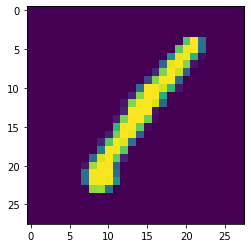

In [45]:
INDEX = 0

plt.imshow(Xtrain[INDEX])
print('Label: {}'.format(y_train[INDEX]))

In [47]:
Xtrain = np.reshape(Xtrain, newshape=(37000, 28, 28, 1))
Xval   = np.reshape(Xval,   newshape=(5000,  28, 28, 1))
Xtest  = np.reshape(Xtest,  newshape=(28000, 28, 28, 1))

print(Xtrain.shape)
print(Xval.shape)
print(Xtest.shape)

(37000, 28, 28, 1)
(5000, 28, 28, 1)
(28000, 28, 28, 1)


In [48]:
#one-hot encode target column
ytrain = to_categorical(ytrain)
yval = to_categorical(yval)

print(ytrain[0])
print(yval[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Train Model

In [49]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [50]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
#train model
model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=3)

Train on 37000 samples, validate on 5000 samples
Epoch 1/3
37000/37000 [==============================] - 36s 975us/step - loss: 0.2383 - accuracy: 0.9453 - val_loss: 0.1127 - val_accuracy: 0.9676
Epoch 2/3
37000/37000 [==============================] - 36s 973us/step - loss: 0.0648 - accuracy: 0.9804 - val_loss: 0.1009 - val_accuracy: 0.9704
Epoch 3/3
37000/37000 [==============================] - 35s 957us/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.1122 - val_accuracy: 0.9724


In [53]:
#show predictions for the first 3 images in the test set
predictions = model.predict(Xtest)

In [60]:
def get_label(probs_list):
    index = 0
    max_prob = max(probs_list)
    while(index < len(probs_list)):
        if(max_prob == probs_list[index]):
            return index
        index += 1
        
yhat = [get_label(probs_list) for probs_list in predictions]
yhat[:4]

[2, 0, 9, 9]

# Submission

In [68]:
submission = pd.read_csv('../submissions/sample_submission.csv')
submission.Label = yhat
submission.to_csv('../submissions/sub_01.csv', index=False)